<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>


In [ ]:
!pip install geopandas
!pip install geopandas fiona
import geopandas as gpd
from fiona import listlayers

# Cargar mapa de alemania
linkWorldMap = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"
listlayers(linkWorldMap)

['indicators', 'countries', 'rivers', 'cities']

EJERCICIO 1

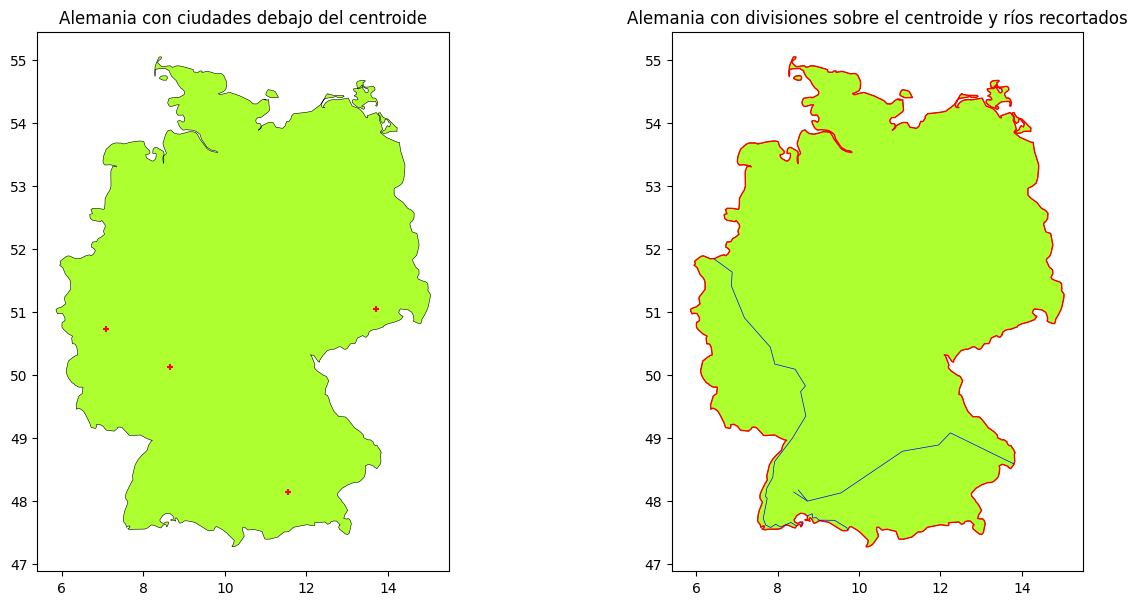

In [ ]:
# Ejercicio 1: Trazado de Alemania con ciudades y divisiones administrativas
import geopandas as gpd
import matplotlib.pyplot as plt
# Cargamos datos y seleccionamos Alemania
linkWorldMap = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"
countries = gpd.read_file(linkWorldMap, layer='countries')
cities = gpd.read_file(linkWorldMap, layer='cities')
rivers = gpd.read_file(linkWorldMap, layer='rivers')

# Recortamos el país Alemania y lo proyectamos a un CRS adecuado para cálculos geométricos
alemania = countries[countries.COUNTRY == 'Germany']
alemania_projected = alemania.to_crs(epsg=3068) # Codigo usado en la anterior tarea

# Calculamos el centroide en el CRS proyectado
centroidX, centroidY = alemania_projected.geometry.centroid.x.values[0], alemania_projected.geometry.centroid.y.values[0]

# Volvemos al CRS geográfico para visualizar el mapa
alemania = alemania_projected.to_crs(countries.crs)

# **Ejercicio 1, Mapa 1: Ciudades debajo del centroide**
# Creamos un subconjunto de ciudades en Alemania y reproyectamos también las ciudades
cities_projected = cities.to_crs(alemania_projected.crs)
citiesAlemania_clipped = gpd.clip(cities_projected, alemania_projected)

# Filtramos las ciudades que están debajo del centroide usando cx
cities_below_centroid = citiesAlemania_clipped.cx[:, :centroidY]

# Graficamos el mapa de Alemania con las ciudades debajo del centroide
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
base1 = alemania.plot(ax=ax[0], facecolor="greenyellow", edgecolor='black', linewidth=0.4)
cities_below_centroid.to_crs(countries.crs).plot(marker='+', color='red', markersize=15, ax=base1)
ax[0].set_title("Alemania con ciudades debajo del centroide")

# **Ejercicio 1, Mapa 2: Divisiones administrativas sobre el centroide y ríos**
# Seleccionamos las divisiones administrativas de Alemania sobre el centroide
divisions_above_centroid = alemania_projected.cx[:, centroidY:]

# Reproyectamos los ríos y creamos un subconjunto de ríos en las divisiones seleccionadas
rivers_projected = rivers.to_crs(alemania_projected.crs)
riversAlemania_clipped = gpd.clip(rivers_projected, divisions_above_centroid)

# Graficamos el mapa de Alemania con las divisiones sobre el centroide y los ríos
base2 = alemania.plot(ax=ax[1], facecolor="greenyellow", edgecolor='black', linewidth=0.4)
divisions_above_centroid.to_crs(countries.crs).plot(ax=base2, facecolor="none", edgecolor='red', linewidth=1)
riversAlemania_clipped.to_crs(countries.crs).plot(edgecolor='blue', linewidth=0.5, ax=base2)
ax[1].set_title("Alemania con divisiones sobre el centroide y ríos recortados")

# Mostrar ambos mapas
plt.show()

**EJERCICIO 2**

In [ ]:
# Cargamos los datos de Alemania
alemania_states=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_States_level_1.shp')
alemania_district=gpd.read_file('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/maps_alemania/germany_District_level_2.shp')

In [ ]:
# Revisamos los tipos de datos
type(alemania_states),type(alemania_district)

(geopandas.geodataframe.GeoDataFrame, geopandas.geodataframe.GeoDataFrame)

In [ ]:
alemania_states.geometry.head()

,geometry
0,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
1,"POLYGON ((9.60208 47.58434, 9.60464 47.58535, ..."
2,"POLYGON ((13.48006 52.67465, 13.47879 52.67345..."
3,"MULTIPOLYGON (((13.05103 51.64768, 13.06022 51..."
4,"MULTIPOLYGON (((8.6164 53.19703, 8.61522 53.19..."


In [ ]:
alemania_states.crs, alemania_district.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [ ]:
alemania.crs.is_projected

False

<Axes: >

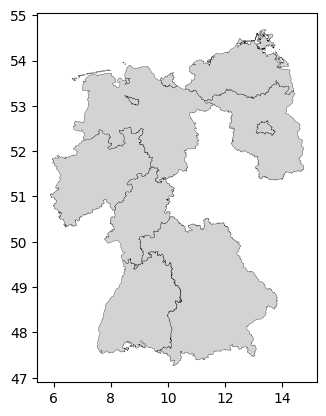

In [ ]:
# Ploteamos el mapa generado
alemania_states.plot(facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [ ]:
alemania_district.head()

,shape2,shapeiso,shapeid,shapegroup,shapetype,shape1,shape0,geometry
0,Stuttgart,None,9070358B86745718691241,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((8.7689 48.52184, 8.76498 48.52..."
1,Karlsruhe,None,9070358B19876986675637,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.41092 49.66351, 9.41106 49.6..."
2,Freiburg,None,9070358B61051204169762,DEU,ADM2,Baden-Wurttemberg,germany,"MULTIPOLYGON (((9.12593 47.66864, 9.12577 47.6..."
3,Tubingen,None,9070358B15022388296844,DEU,ADM2,Baden-Wurttemberg,germany,"POLYGON ((8.7689 48.52184, 8.76953 48.52369, 8..."
4,Oberbayern,None,9070358B1315543690610,DEU,ADM2,Bayern,germany,"POLYGON ((10.88629 47.53674, 10.88476 47.53751..."


<Axes: >

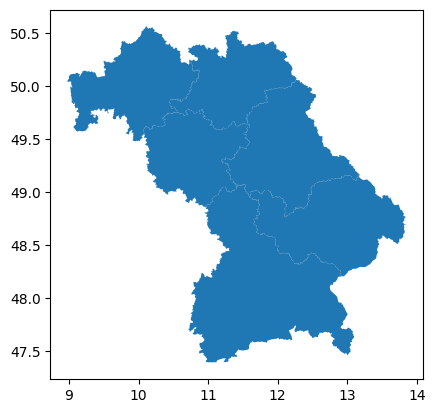

In [ ]:
alemania_district[alemania_district.shape1=='Bayern'].plot()

In [ ]:
Bayern_dissolve=alemania_district[alemania_district.shape1=='Bayern'].dissolve()

# we got?
type(Bayern_dissolve)

geopandas.geodataframe.GeoDataFrame

In [ ]:
Bayern_dissolve

,geometry,shape2,shapeiso,shapeid,shapegroup,shapetype,shape1,shape0
0,"POLYGON ((10.88354 47.53849, 10.88301 47.53913...",Oberbayern,None,9070358B1315543690610,DEU,ADM2,Bayern,germany


In [ ]:
# keeping what is relevant
Bayern_dissolve.drop(columns=['shapeiso','shapetype','shapeid'],inplace=True)

# then
Bayern_dissolve

,geometry,shape2,shapegroup,shape1,shape0
0,"POLYGON ((10.88354 47.53849, 10.88301 47.53913...",Oberbayern,DEU,Bayern,germany


In [ ]:
Alemania_shape1_diss=alemania_district.dissolve(by='shape1')

In [ ]:
Alemania_shape1_diss

,geometry,shape2,shapeiso,shapeid,shapegroup,shapetype,shape0
shape1,,,,,,,
Baden-Wurttemberg,"MULTIPOLYGON (((8.70562 47.71173, 8.70612 47.7...",Stuttgart,None,9070358B86745718691241,DEU,ADM2,germany
Bayern,"POLYGON ((10.88354 47.53849, 10.88301 47.53913...",Oberbayern,None,9070358B1315543690610,DEU,ADM2,germany


In [ ]:
Alemania_shape1_diss.drop(columns=['shapeiso','shapeid','shapetype'],inplace=True)
Alemania_shape1_diss.reset_index(inplace=True)
Alemania_shape1_diss.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   shape1      2 non-null      object  
 1   geometry    2 non-null      geometry
 2   shape2      2 non-null      object  
 3   shapegroup  2 non-null      object  
 4   shape0      2 non-null      object  
dtypes: geometry(1), object(4)
memory usage: 208.0+ bytes


<Axes: >

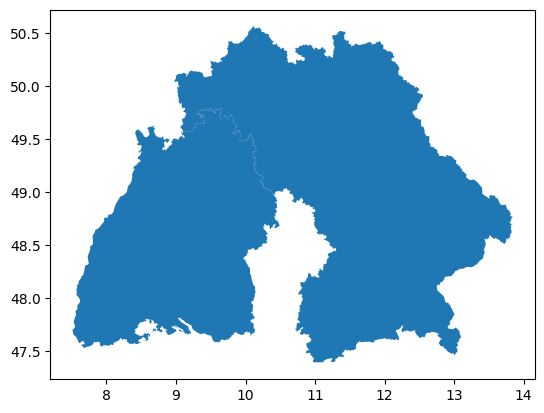

In [ ]:
Alemania_shape1_diss.plot()

**EJERCICIO 3**

In [52]:
import geopandas as gpd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# Cargamos datos y seleccionamos Alemania
linkWorldMap = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

# Cargar los datos de los países, ciudades y ríos
countries = gpd.read_file(linkWorldMap, layer='countries')
cities = gpd.read_file(linkWorldMap, layer='cities')
rivers = gpd.read_file(linkWorldMap, layer='rivers')

# Seleccionar Alemania y proyectar a un CRS adecuado para cálculos geométricos
alemania = countries[countries.COUNTRY == 'Germany']
alemania_projected = alemania.to_crs(epsg=3068) # Código CRS para cálculos geométricos

In [27]:
# importamos los datos de los aeropuertos
import pandas as pd

infoairports=pd.read_csv('https://github.com/DiegoAntonio-web/introgeodf/raw/refs/heads/main/data/airports.csv')
# Filtramos para tener los aeropuertos de Alemania
german_airports = infoairports[infoairports['iso_country'] == 'DE']
# Limpiamos los valores de coordenadas incoherentes

german_airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
21224,45044,DE-0001,heliport,Klinikum am Plattenwald Helipad,49.212856,9.236729,NaN,EU,DE,DE-BW,Bad Friedrichshall,no,NaN,NaN,NaN,NaN,NaN,NaN
21225,332693,DE-0002,closed,Ahlhorn Highway Strip,52.929984,8.173538,NaN,EU,DE,DE-NI,Großenkneten,no,NaN,NaN,NaN,NaN,NaN,Ahlhorn Autobahn-Notlandeplatz NLP
21226,299694,DE-0003,small_airport,August Euler Airfield,49.853757,8.586243,358.0,EU,DE,DE-HE,Griesheim,no,EDES,NaN,NaN,https://web.archive.org/web/20201019233127/htt...,https://en.wikipedia.org/wiki/Griesheim_Airport,"ZCS, August-Euler Flugplatz, Griesheim Airport"
21227,28576,DE-0004,small_airport,Gransee Airfield,53.006280,13.202177,164.0,EU,DE,DE-BR,Gransee,no,EDUG,NaN,NaN,http://www.gojump.de/,https://de.wikipedia.org/wiki/Flugplatz_Gransee,NaN
21228,322973,DE-0005,small_airport,Warngau Airfield,47.823990,11.703980,2380.0,EU,DE,DE-BY,Warngau,no,NaN,NaN,NaN,http://www.fliegerclub-warngau.de,NaN,"münchen, munich, wargau"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29556,34923,GWW,closed,Gatow Airport,52.474400,13.138100,161.0,EU,DE,DE-BE,Spandau,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Gatow_Airport,"GWW, EDBG, General-Steinhoff Kaserne, Luftwaff..."
29745,355231,HHBG,heliport,Christoph Hansa ADAC Helipad,53.507971,10.173382,136.0,EU,DE,DE-HH,Hamburg,no,NaN,NaN,NaN,NaN,https://de.wikipedia.org/wiki/Christoph_Hansa,"HHBG, BG Klinikum Boberg"
53697,46652,RHST,small_airport,Rheinstetten Glider Field,48.977700,8.342500,380.0,EU,DE,DE-BW,Rheinstetten,no,NaN,NaN,NaN,http://www.sfg-reiselfingen.de/,NaN,NaN
77507,308946,WID,closed,RAF Wildenrath,51.114100,6.215100,285.0,EU,DE,DE-NW,British Armed Forces,no,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/RAF_Wildenrath,"WID, WID"


In [45]:
# Calcular el centroide en el CRS proyectado
centroidX, centroidY = alemania_projected.geometry.centroid.x.values[0], alemania_projected.geometry.centroid.y.values[0]
# Filtramos los aeropuertos medianos en Alemania
medium_airports = german_airports[german_airports.type == 'medium_airport']

In [30]:
from shapely.geometry import Polygon
from shapely.ops import unary_union

In [53]:
# Convertir coordenadas en puntos y crear un GeoDataFrame
points = [Point(xy) for xy in zip(german_airports.longitude_deg, german_airports.latitude_deg)]
airport_gdf = gpd.GeoDataFrame(german_airports, geometry=points)

In [54]:
# Calcular el convex hull
airport_hull = airport_gdf.unary_union.convex_hull
airport_hull_gdf = gpd.GeoDataFrame(geometry=[airport_hull], crs=airport_gdf.crs)

<ipython-input-54-ff038090bfca>:2: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  airport_hull = airport_gdf.unary_union.convex_hull


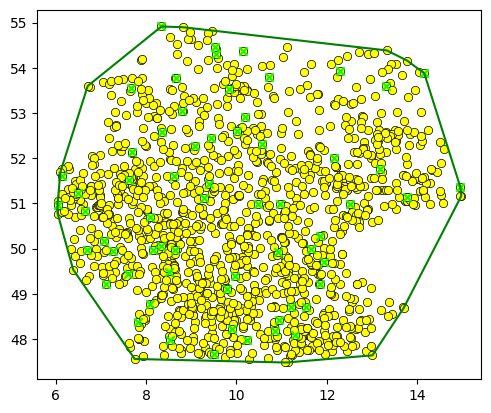

In [55]:
# Graficar
base = airport_gdf.plot(facecolor='yellow', edgecolor='black', linewidth=0.5)
medium_airports_gdf = gpd.GeoDataFrame(medium_airports, geometry=[Point(xy) for xy in zip(medium_airports.longitude_deg, medium_airports.latitude_deg)])
medium_airports_gdf.plot(ax=base, color='lime', marker='x')
airport_hull_gdf.plot(ax=base, facecolor='none', edgecolor='green', linewidth=1.5)

plt.show()

Ejercicio 4


In [84]:
from shapely.geometry import box
import matplotlib.pyplot as plt
# Cargamos los datos de Alemania
%matplotlib inline
# Cargamos datos y seleccionamos Alemania
linkWorldMap = "https://github.com/CienciaDeDatosEspacial/intro_geodataframe/raw/main/maps/worldMaps.gpkg"

# Cargar los datos de los países
countries = gpd.read_file(linkWorldMap, layer='countries')
# Seleccionar Alemania y proyectar a un CRS adecuado para cálculos geométricos
alemania = countries[countries.COUNTRY == 'Germany']
alemania_projected = alemania.to_crs(epsg=3068) # Código CRS para cálculos geométricos

In [85]:
# Obtenemos el centroide de Alemania para dividir en regiones norte-sur y este-oeste
centroidX = alemania_projected.centroid.x.values[0]
centroidY = alemania_projected.centroid.y.values[0]

In [86]:
# Dividimos a Alemania en secciones norte y sur usando el centroide
north_box = box(alemania_projected.total_bounds[0], centroidY, alemania_projected.total_bounds[2], alemania_projected.total_bounds[3])
south_box = box(alemania_projected.total_bounds[0], alemania_projected.total_bounds[1], alemania_projected.total_bounds[2], centroidY)
north_germany = alemania_projected.intersection(north_box)
south_germany = alemania_projected.intersection(south_box)

In [87]:
# Intersección Norte-Sur y creación de GeoDataFrame de geometrías válidas
north_south_intersection = north_germany.intersection(south_germany)

In [88]:
# Filtramos geometrías válidas
valid_geometries = [geom for geom in north_south_intersection if geom.is_valid and not geom.is_empty]
north_south_gdf = gpd.GeoDataFrame(geometry=valid_geometries)

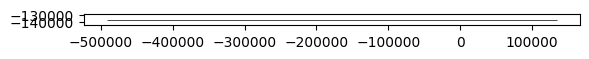

In [89]:
# Graficar la intersección norte-sur
base_intersection = north_south_gdf.plot(facecolor='lime', edgecolor='black', linewidth=0.5)

In [90]:
# Dividir Alemania en Este y Oeste usando geometría
west_box = box(alemania_projected.total_bounds[0], alemania_projected.total_bounds[1], centroidX, alemania_projected.total_bounds[3])
east_box = box(centroidX, alemania_projected.total_bounds[1], alemania_projected.total_bounds[2], alemania_projected.total_bounds[3])
west_germany = alemania_projected.intersection(west_box)
east_germany = alemania_projected.intersection(east_box)

In [91]:
# Diferencia Simétrica Este-Oeste
east_west_sym_diff = west_germany.symmetric_difference(east_germany)

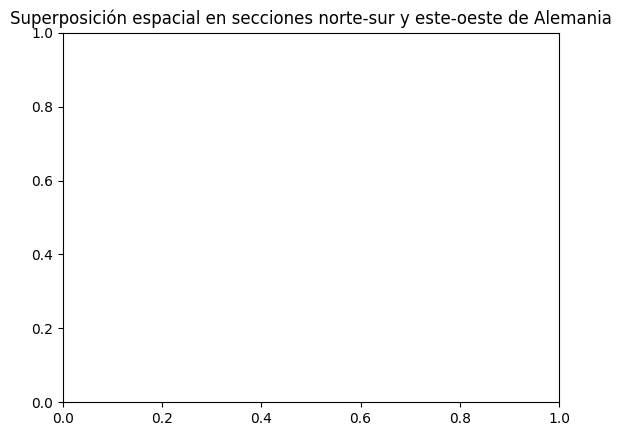

In [92]:
# Crear GeoDataFrame para graficar la diferencia simétrica
east_west_gdf = gpd.GeoDataFrame(geometry=[geom for geom in east_west_sym_diff if geom.is_valid and not geom.is_empty])
east_west_gdf.plot(ax=base_intersection, facecolor='none', edgecolor='red', linewidth=1)

plt.title("Superposición espacial en secciones norte-sur y este-oeste de Alemania")
plt.show()